In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [32]:
raw_data = (
    pd.read_csv('../data/train.tsv', sep='\t')
)

In [33]:
raw_data.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


# TODO:

## Justin
- clean category_name into 3 (n) sub cats - Done
- item condition id = https://www.mercari.com/help_center/article/316/
- exclude price with 0 or error - done
- find brand name from description or item description
- those without brand name will be clustered together with brand name
- assume categorization is correct for first iteration
- find age of product from item name or description if possible



## Shuming
- age of product from item description if possible
- text sentiment analysis from item description --> this correlates with item condition

In [4]:
len(raw_data['train_id'])

1482535

## Splitting Categories into main, sub and sub sub

## Quite a lot of missing categories

Over 6300 obs with missing categories. Leaving aside for the moment.

In [34]:
print len(raw_data[pd.isna(raw_data['category_name'])==True])
print raw_data[pd.isna(raw_data['category_name'])==True].head()

6327
      train_id                                      name  item_condition_id  \
122        122                                    Bundle                  3   
155        155                      3 Nora Roberts Books                  3   
258        258                               ACER Laptop                  5   
984        984  AUTHENTIC BRWN MICHAEL KORS MAKEUP STAIN                  4   
1185      1185   Teenage Mutant Ninja Turtle Van/ Extras                  3   

     category_name    brand_name  price  shipping  \
122            NaN           NaN   59.0         0   
155            NaN           NaN   10.0         1   
258            NaN           NaN   14.0         0   
984            NaN  Michael Kors   18.0         0   
1185           NaN   Nickelodeon    9.0         0   

                                       item_description  
122   Sizes and info of clothes can be found on thei...  
155                                        For aferg16.  
258   Powers on, no screen 

In [35]:
temp = raw_data['category_name'].apply(lambda x: 'NaN' if pd.isna(x) else x.split("/"))

In [36]:
raw_data['main_category']=temp.apply(lambda x: x[0])
raw_data['sub_category']=temp.apply(lambda x: x[1])
raw_data['subsub_category']=temp.apply(lambda x: x[2])

In [37]:
raw_data.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,main_category,sub_category,subsub_category
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet,Men,Tops,T-shirts
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...,Home,Home Décor,Home Décor Accents
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces


## Cleaning Price data

No missing price data

In [38]:
raw_data['price'].isnull().values.any()

False

In [39]:
raw_data['price'].describe()

count    1.482535e+06
mean     2.673752e+01
std      3.858607e+01
min      0.000000e+00
25%      1.000000e+01
50%      1.700000e+01
75%      2.900000e+01
max      2.009000e+03
Name: price, dtype: float64

(array([ 874.,    0.,    0., ...,    0.,    0.,    1.]),
 array([  0.00000000e+00,   3.33222757e-01,   6.66445513e-01, ...,
          2.00833355e+03,   2.00866678e+03,   2.00900000e+03]),
 <a list of 6029 Patch objects>)

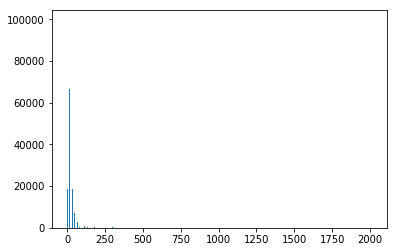

In [40]:
plt.hist(raw_data['price'],bins='fd')

## Cleaning Brand Names

In [41]:
raw_data['brand_name'].describe()

count     849853
unique      4809
top         PINK
freq       54088
Name: brand_name, dtype: object

In [48]:
np.sort(raw_data['brand_name'].unique())[0:99].tolist()

[nan,
 '!iT Jeans',
 '% Pure',
 '10.Deep',
 '191 Unlimited',
 '1byone',
 '21men',
 '24/7 Comfort Apparel',
 '2K Games',
 '2XU',
 '3.1 Phillip Lim',
 '3M\xc2\xae',
 '47',
 '47 Brand',
 '5.11 Tactical',
 '525 America',
 '5th & Ocean',
 '7 Diamonds',
 '7 For All Mankind\xc2\xae',
 '8732 Apparel',
 '90 Degree By Reflex',
 'A Bathing Ape',
 'A Pea In The Pod',
 'A Plus Child Supply',
 'A Wish Come True',
 'A&A Optical',
 'A&E',
 'A&R Sports',
 'A+D',
 'A-Shirt',
 'A. Byer',
 'A.B.S. by Allen Schwartz',
 'A.D. Sutton & Sons',
 'A.K.A',
 'A.L.C.',
 'A.P.C.',
 'A/X Armani Exchange',
 'AA Aquarium',
 'AB Studio',
 'ABC Studios',
 'ABS by Allen Schwartz',
 'AC/DC',
 'ACCEL',
 'ACDelco',
 'ADAM',
 'AERIN',
 'AG Adriano Goldschmied',
 'AGB',
 'AGUADECOCO',
 'AKA New York',
 'AKIRA',
 'AKOO',
 'ALDO',
 'ALEX AND ANI',
 'ALLOY',
 'ALO Yoga',
 'AMD',
 'AMIA',
 'ANAMA',
 'AND',
 'AND1',
 'ANDREA FENZI',
 'ANGL',
 'API',
 'ARCONA',
 'ART',
 'ASICS',
 'ASOLO',
 'ASOS',
 'ASSETS by Sara Blakely',
 'ASTR'